**探索合併後的資料找課題**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
UNIT_TIME = 365 # 一個購物週期3個月
UNIT_CNT = 4
UNIT_RECENT_COUNT_THREDSHOLD = 10

**讀取資料**

In [3]:
member = pd.read_csv('../NTU_1317_Member.txt', sep='\t')

C:\Users\andyl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
main_data = pd.read_csv('../Ntu_Orders.csv')

**選擇最近一個購物周期內的購物紀錄**

In [5]:
main_data['DateId'] = pd.to_datetime(main_data['DateId'].astype(str), format='%Y%m%d')

In [6]:
#time_end = main_data['DateId'].max()
time_end = main_data['DateId'].max()# - 2 * pd.Timedelta(days=UNIT_TIME * UNIT_CNT)
time_start = time_end - pd.Timedelta(days=UNIT_TIME * UNIT_CNT)
main_data = main_data[(main_data['DateId'] > time_start) & (main_data['DateId'] <= time_end)]
main_data

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,UnitPrice,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift
0,26914456,2017-01-03,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False
1,26914457,2017-01-03,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False
2,26767644,2017-01-01,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,350.0,-34.0,0.0,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False
3,26780512,2017-01-01,C39E36F7-5091-48DA-BE8F-8CE043E009EE,26837997,1317,10036,"b'&QI#u)\xf8\xf7\n6\x01~\xd1\xf3,\x1f\xb8\xe3\...",Web,Brand,Mobile,...,540.0,-57.0,0.0,483.0,2017-01-01 21:41:58.153,Finish,Family,Family,NaN,False
4,26823950,2017-01-02,7D87099A-B49C-4136-A8E9-F76BB5588B19,26881442,1317,10268,b'\xfd\x0b\x9ee\xdc\xaea@\x102;jX\xfek\x99m\x1...,Web,Brand,Mobile,...,445.0,-44.0,0.0,401.0,2017-01-02 15:37:33.610,Finish,Family,Family,NaN,False
5,26881155,2017-01-03,2ED6E54C-A7B0-447F-B3C7-8B0CA4536E54,26938659,1317,9897,b'\x9a\xee\xee\xb30pf8d\x0bp\x8b\xaa\xde\xa8\x...,Web,Brand,Mobile,...,180.0,-24.0,0.0,156.0,2017-01-03 12:56:21.980,Finish,Family,Family,NaN,False
6,26928963,2017-01-04,6B11D879-C56E-4057-A6A0-45C30732F542,26986470,1317,10029,"b'\x9e\xc5{\xe4\xfd_\xa9XP\x19*\xc4\x9c""\x0b%\...",Web,Brand,Mobile,...,249.0,-26.0,0.0,223.0,2017-01-04 08:31:00.313,Finish,Family,Family,NaN,False
7,26942457,2017-01-04,249FEB46-134C-4DE3-902D-73D289D130DB,26999964,1317,10029,b'\xf7\xca\xed\xd5\xaf{\xfem\xa4\x88\x16)0\x88...,Web,Brand,Mobile,...,249.0,-13.0,0.0,236.0,2017-01-04 13:58:47.880,Finish,Family,Family,NaN,False
8,26945149,2017-01-04,54B80CB7-78BA-49D7-9850-0A61A9B67E03,27002656,1317,8823,"b'\t\x90\xf9\xe6sc\x9d\xe3%eZ,C$\x8f{~\xe6`\xa8'",Web,Brand,Mobile,...,250.0,-25.0,0.0,225.0,2017-01-04 14:51:30.517,Finish,Family,Family,NaN,False
9,26914458,2017-01-03,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971962,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False


**統計單次消費金額**

In [7]:
main_by_basket = main_data.groupby(by=['TradesOrderGroupCode','MemberId'], as_index=False)['SalesOrderSlaveTotalPayment'].sum()
main_by_basket

,TradesOrderGroupCode,MemberId,SalesOrderSlaveTotalPayment
0,"b"" y!'[+Jr\xd6\xd2D@\x1e\xee\x17lm\xca\xda""",D9EAAC0E-21F7-40B6-B772-B1B522E54F5F,837.0
1,"b"" #\xa6'/\x82\xe7`\xb6\xb6\xfd\xa9p\x9cIr\x11...",52EA5CE7-D2F0-4410-B339-A6ED6C18B8A3,647.0
2,"b"" #\xfeH\xbc\xeb2\x1a\xd8\xd5n\x0b'\x0e6CEf\x...",88142B29-5D86-4338-A450-A04E547DC74B,690.0
3,"b"" $\x9f\x86M@m'\xaf\x90Z\x9f\x10Eko \xeb\xa7\...",4A84F2A6-C852-44DC-94B4-686814DE798B,921.0
4,"b"" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\...",DDB25D8C-C936-4D37-BF28-3F2F4692C5A8,1583.0
5,"b"" %\xbd\xa2\x0c\x04&\xa6d\xc1K\xd5\xc0\xb7v'\...",DFB68BE2-7E51-49B0-8E1F-B4577BA8A34D,697.0
6,"b"" '\x08\xffW\xcby`]\x15\xba\xff\xabE\xee\xa1\...",10A11D54-E407-4C98-9771-F0C926DA6E6C,747.0
7,"b"" '\x15\xa0\x15\xea\x8f\xc5\xe6\xedk\xba\x0cP...",B984166B-C4B9-4749-AFDD-EB6BCD9C2E16,629.0
8,"b"" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa...",42271E13-FDE9-484D-9F4A-C3C4BD89850F,2042.0
9,"b"" '\x8b8~\x9a\x1c\xcf\xc2\x01\x9d\x11\xbc'\x8...",BC448310-A8CA-4577-95D3-4631302EEBF2,1190.0


**計算每位會員平均單次消費額**

In [8]:
'''

def group(df, who):
    mean = 0; cnt = 0
    for i in range(df.shape[0]):
        if df['MemberId'][i] == who:
            #mean += df['UnitPrice'][i] * df['Quantity'][i]
            mean += df['TotalPurchase'][i]
            cnt += 1
    return mean / cnt
group(main_by_basket, 'D9EAAC0E-21F7-40B6-B772-B1B522E54F5F')

'''

"\n\ndef group(df, who):\n    mean = 0; cnt = 0\n    for i in range(df.shape[0]):\n        if df['MemberId'][i] == who:\n            #mean += df['UnitPrice'][i] * df['Quantity'][i]\n            mean += df['TotalPurchase'][i]\n            cnt += 1\n    return mean / cnt\ngroup(main_by_basket, 'D9EAAC0E-21F7-40B6-B772-B1B522E54F5F')\n\n"

In [9]:
def rename_col_to(name):
    if name == 'SalesOrderSlaveTotalPayment':
        return 'RecentAveragePurchase'
    else:
        return name
    
member_avg = pd.DataFrame()
member_avg = main_by_basket.groupby(by='MemberId', as_index=False).agg('mean')
member_avg = member_avg.rename(columns = rename_col_to)
member_avg.head()

,MemberId,RecentAveragePurchase
0,00002962-4E01-4D5B-A23C-AF05A965212E,2963.0
1,000037B9-82D7-4F41-A748-FD64AF00A535,1196.0
2,00004BE7-17B5-4DA8-A31D-673BCD22F018,316.0
3,00008557-6564-46EB-8B00-70D3DEE91FF0,679.0
4,000248F1-4864-40B7-A987-E27884C0971C,597.0


**統計該次購物周期內消費的總額**

In [10]:
member_cnt = main_by_basket.groupby(by='MemberId', as_index=False).agg('count')
member_avg['RecentCount'] = member_cnt['TradesOrderGroupCode']
member_avg['RecentTotal'] = member_avg['RecentCount'] * member_avg['RecentAveragePurchase']
member_avg.head()

,MemberId,RecentAveragePurchase,RecentCount,RecentTotal
0,00002962-4E01-4D5B-A23C-AF05A965212E,2963.0,2,5926.0
1,000037B9-82D7-4F41-A748-FD64AF00A535,1196.0,1,1196.0
2,00004BE7-17B5-4DA8-A31D-673BCD22F018,316.0,1,316.0
3,00008557-6564-46EB-8B00-70D3DEE91FF0,679.0,2,1358.0
4,000248F1-4864-40B7-A987-E27884C0971C,597.0,1,597.0


In [11]:
'''
#把index中的MemberId救出來
member_avg['Unnamed'] = list(range(0, member_avg.shape[0]))
member_avg['MemberId'] = member_avg.index.values
member_avg = member_avg.set_index('Unnamed')
member_avg
'''

"\n#把index中的MemberId救出來\nmember_avg['Unnamed'] = list(range(0, member_avg.shape[0]))\nmember_avg['MemberId'] = member_avg.index.values\nmember_avg = member_avg.set_index('Unnamed')\nmember_avg\n"

In [12]:
member_new = pd.merge(member, member_avg, on='MemberId')
member_new.head()

,ShopId,MemberId,Recency,Frequency,Monetary,Birthday,GenderTypeDef,LocationCity,LocationState,LocationCountry,...,ValidFlag,MinOrderDate,MaxOrderDate,IsAppInstalled,IsInBlackList,MinAppOpenDateTime,MaxAppOpenDateTime,RecentAveragePurchase,RecentCount,RecentTotal
0,1317,88812F54-9F19-49C0-BC77-86065C356D26,251,3,4011.0,1980-08-08,Female,NaN,台中市,台灣,...,1,2015-09-18,2017-05-02,有,NaN,2015-09-18 18:45:35.707,2017-07-30 21:30:34.940,1204.5,2,2409.0
1,1317,17ED6C4D-0B91-4EB4-9992-117E9440425D,56,3,2438.0,NaN,NaN,NaN,NaN,NaN,...,1,2017-06-02,2017-10-27,NaN,NaN,NaN,NaN,783.0,4,3132.0
2,1317,E697E909-3142-4686-A7C6-540909465169,13,3,2651.0,NaN,NaN,NaN,NaN,NaN,...,1,2015-10-01,2015-10-16,NaN,NaN,NaN,NaN,1229.0,2,2458.0
3,1317,D8A55D64-AEB0-4DC4-85C6-3372238C46D3,-1,0,0.0,NaN,NaN,NaN,NaN,NaN,...,1,2017-03-19,2017-03-19,NaN,NaN,NaN,NaN,199.0,1,199.0
4,1317,978EBCAE-9E66-44D9-926B-D35B0C1079E9,190,1,1174.0,NaN,NaN,NaN,NaN,NaN,...,1,2017-07-02,2017-07-02,NaN,NaN,NaN,NaN,1174.0,1,1174.0


**計算每個購買次數消費均額的平均值**
**並印出結果**

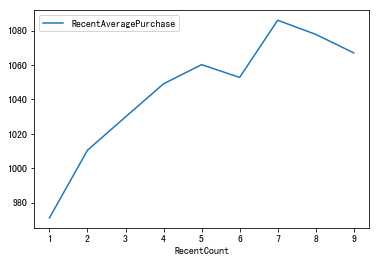

In [13]:
tmp0 = member_new.groupby(by=['RecentCount'], as_index=False)['RecentAveragePurchase'].mean()
tmp0[tmp0['RecentCount'] < UNIT_RECENT_COUNT_THREDSHOLD].plot.line(x='RecentCount', y='RecentAveragePurchase')
plt.show()

把各顧客分群並標上標記

In [14]:
RecentCount_threshold = 2
RecentAveragePurchase_threshold = 1000
#1 = 第一象限 2 = 第二象限 3 = 第三象限 4 = 第四象限

apply分組... 極為耗時
引入多進程平行執行 (由於python直譯器的缺陷，不用多線程)<br/>
**還不能動**

In [15]:
from multiprocessing import cpu_count, Pool
def parallelize(df, task, cores = cpu_count()):
    data_split = np.array_split(df, cores)
    pool = Pool(cores)
    data = pd.concat(pool.map(task, data_split))
    pool.close()
    pool.join()
    return data

In [16]:
def set_member_group(row, axis_key_x = 'RecentCount', axis_key_y = 'RecentAveragePurchase', axis_th_x = RecentCount_threshold, axis_th_y = RecentAveragePurchase_threshold):
    value = 0
    if row[axis_key_x] < axis_th_x:
        if row[axis_key_y] < axis_th_y:
            value = 3
        else:
            value = 2
    else:
        if row[axis_key_y] < axis_th_y:
            value = 4
        else:
            value = 1
    return value
'''
def set_member_group_df(df, axis_key_x = 'RecentCount', axis_key_y = 'RecentAveragePurchase', group_key = 'GroupQuadrant', axis_th_x = RecentCount_threshold, axis_th_y = RecentAveragePurchase_threshold):
    value = 0
    length = df.shape[0]
    for i in range(length):
        if df.loc[i, axis_key_x] < axis_th_x:
            if df.loc[i, axis_key_y] < axis_th_y:
                value = 3
            else:
                value = 2
        else:
            if df.loc[i, axis_key_y] < axis_th_y:
                value = 4
            else:
                value = 1
        df.loc[i, group_key] = value
    return df'''
member_new['GroupQuadrant'] = member_new.apply(set_member_group, axis = 1)
#member_new = parallelize(member_new, set_member_group_df)

統計各群客戶的info

In [17]:
statistics = pd.DataFrame()

In [18]:
statistics['MemberCount'] = member_new.groupby(by='GroupQuadrant')['MemberId'].agg(['count'])['count']
statistics

,MemberCount
GroupQuadrant,
1,45071
2,58371
3,107347
4,59935


In [19]:
statistics['TotalSales'] = member_new.groupby(by='GroupQuadrant')['RecentTotal'].agg(['sum'])['sum']
statistics

,MemberCount,TotalSales
GroupQuadrant,,
1,45071,232637535.0
2,58371,90553426.0
3,107347,70366470.0
4,59935,141224587.0


可以發現低消新客人數最多

In [20]:
statistics['AppInstalledCount'] = member_new.groupby(by='GroupQuadrant')['IsAppInstalled'].agg(['count'])['count']
statistics['AppInstallRatio'] = statistics['AppInstalledCount']/statistics['MemberCount']
statistics

,MemberCount,TotalSales,AppInstalledCount,AppInstallRatio
GroupQuadrant,,,,
1,45071,232637535.0,27082,0.600874
2,58371,90553426.0,24196,0.414521
3,107347,70366470.0,35832,0.333796
4,59935,141224587.0,30379,0.506866


In [21]:
statistics.index = ['高消熟客','低消熟客','低消新客','高消新客']
statistics

,MemberCount,TotalSales,AppInstalledCount,AppInstallRatio
高消熟客,45071,232637535.0,27082,0.600874
低消熟客,58371,90553426.0,24196,0.414521
低消新客,107347,70366470.0,35832,0.333796
高消新客,59935,141224587.0,30379,0.506866


In [22]:
member_new[pd.notnull(member_new['Monetary'])].shape

(270724, 28)